<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [170]:
#Write code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [171]:
# Load the data
data= pd.read_csv("HR_comma_sep.csv")
df=data

In [172]:
# Find the shape
df.shape

(14999, 10)

In [6]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [10]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
    df.describe(include='O')

,dept,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


satisfaction_level: left skewed
last_evaluation: left skewed
number_project: left skewed
average_montly_hours: right skewed
time_spend_company: right skewed
Work_accident: right skewed
left: right skewed
promotion_last_5years: right skewed

In [16]:
# Find the null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

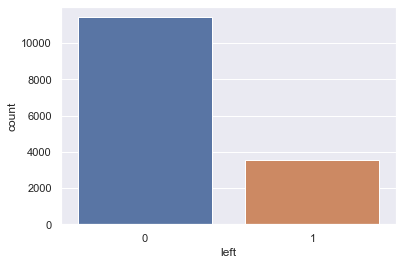

In [18]:
# Count of how many employees left the company
sns.countplot(x='left', data=df)

**Question:What can you interpret from the plot above?** 

Answer: More than 3500 less han 4000 employees have left the company asper dataset

**Task 3: Find out the number of projects being handled.**

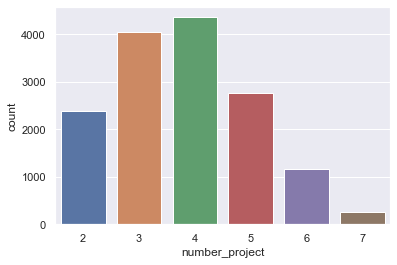

In [19]:
# Write code here
sns.countplot(x='number_project', data=df)

**Question: What insights can you infer from the above plot?**

Answer: Maximum people around 4500 have 4 projects but around 2800 number of employee have 5 projects similarly around 1200 employee have six projects but there are people around 200 who have 7 projects assigned contrary to the 2400 approx employees assigned 2 projects only 



**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

In [41]:
project_left = df.groupby('number_project').agg({'left': 'sum'})
project_left = project_left.reset_index()
project_left

,number_project,left
0,2,1567
1,3,72
2,4,409
3,5,612
4,6,655
5,7,256


**Task 5:** Make a plot of your findings (only turn-over employees)

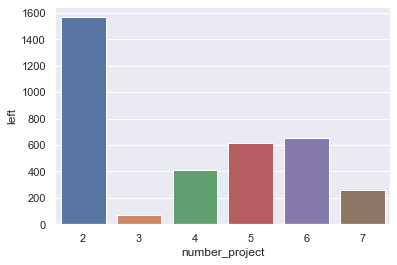

In [42]:
sns.barplot(x='number_project', data=project_left, y='left')

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: No ofpeople wih 2 projects assigned have the maimum turnout ratio. Maybe the incentive is low from two projects , may be they dont find growth also the personels with higher projects also have leaving trend. On the other hand 7 projects handled by employee may be those who are authorities or Project executives fails this trend. also people with 3 pprojecs are minimum toleavethe company

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

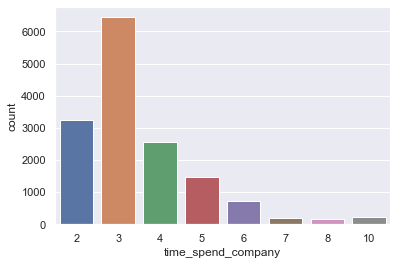

In [59]:
# Show the plot for the count of years here
sns.countplot(x="time_spend_company", data= df)

**Question: What is the maximum number of time spend by the employees?**

Answer: 3years is the most common duration of employees stay in company  

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

In [77]:
people_left = df.groupby('time_spend_company').agg({'left': 'sum'})
people_left.reset_index()




,time_spend_company,left
0,2,53
1,3,1586
2,4,890
3,5,833
4,6,209
5,7,0
6,8,0
7,10,0


In [78]:
# Write the code here to get the percentage of employees leaving.
people_left["percentage"]= people_left["left"] / df['left'].sum() * 100
people_left.reset_index()
people_left



,left,percentage
time_spend_company,,
2,53,1.484178
3,1586,44.413330
4,890,24.922991
5,833,23.326799
6,209,5.852702
7,0,0.000000
8,0,0.000000
10,0,0.000000


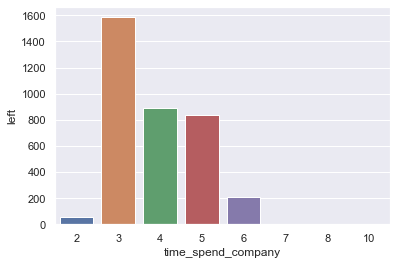

In [81]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
people_left["time_spend_company"]= people_left.index
sns.barplot(x= "time_spend_company", y="left", data=people_left)

**Question: After what time period are employees most likely to leave the company ?**

Answer: after 3 years

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

In [187]:
df["left"].agg({'left'==0: 'count'})
work_acc_left["not_left"]= df[df['left']==0].agg({'left': 'count'})
work_acc_left
agg(lambda x: (x=='X').sum())

,left,not_left
Work_accident,,
0,3402,NaN
1,169,NaN


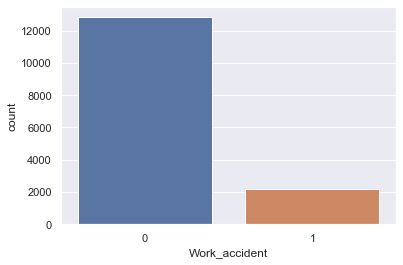

In [84]:
# Number of employees involved in work accident
sns.countplot(x="Work_accident", data=df)

**Question: What can you conclude from the graph above?**

Answer: There is a majoriy seen from the graph that around 11000 people are not involved in any work accident. But there are aove 2000 and below 3000 involved in work accidents

In [215]:
# Number of employees involved in work accident and left or not left
work_acc_left = df.groupby('Work_accident').agg({'left': 'sum'})
work_acc_left.reset_index()

,Work_accident,left
0,0,3402
1,1,169


In [226]:
work_acc_left["not_left"] = df.groupby('Work_accident')['left'].agg(lambda x: (x == 0).sum())
work_acc_left

,left,not_left
Work_accident,,
0,3402,9428
1,169,2000


## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [ ]:
number_of_employees_got_promote= 

In [252]:
number_of_employees_got_promote= df.groupby('promotion_last_5years').agg({'left': 'sum', "promotion_last_5years": lambda x: pd.Series.value_counts(x)})
number_of_employees_got_promote
number_of_employees_got_promote = number_of_employees_got_promote.rename(columns={'promotion_last_5years': 'promo_last_5years', 'left': 'left', 'promotion_last_5years': 'no_of_promos'})
number_of_employees_got_promote


,left,no_of_promos
promotion_last_5years,,
0,3552,14680
1,19,319


Answer: It can be seen clearly that 14680 employees have not been promoted from which 3552 left
        and 319 have been promoted from which only 19 left

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

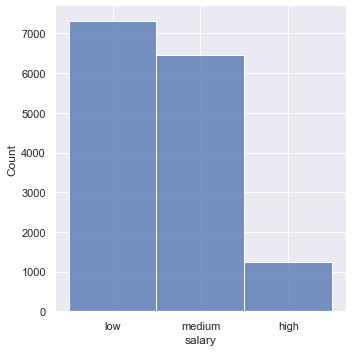

In [127]:
#Write code here
sns.displot(data=df, x="salary")

Answer: maximum no of people have a very low wages a very few around 1200 have a high salary. wheras around 6400 have a medium salary

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [264]:
sal_type_left = df.groupby('salary').agg({'left': 'sum'})
sal_type_left.reset_index()
sal_type_left["percent"]= sal_type_left["left"] / sal_type_left['left'].sum() * 100
sal_type_left.reset_index()

,salary,left,percent
0,high,82,2.296276
1,low,2172,60.823299
2,medium,1317,36.880426


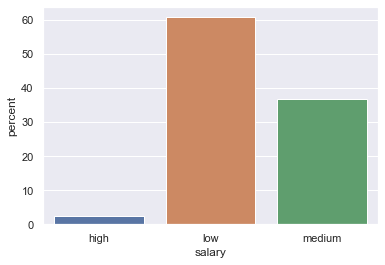

In [266]:
sal_type_left["salary"]= sal_type_left.index
sns.barplot(x= "salary", y="percent", data=sal_type_left)

**Question: What does the above plot show?**

Answer: The 60.8% of employee  have left due to low salary and following the trend of medium which shows 36% of medium salary employee left  and the lowest number of people who leave are those who have high salary are just 2%

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

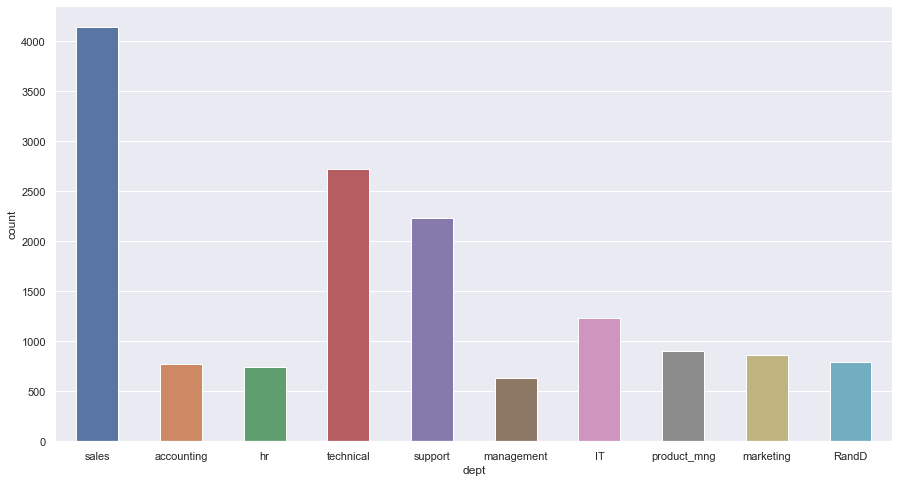

In [166]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.

sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x= "dept", data= df, width=0.5)

**Question: Which department has maximum number of employees?**

Sales have higher no of employees

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [290]:
# Write code here  which which department has highest number of employees leaving the company.

df_dep_left =df.groupby('dept').agg({'left': 'sum'})
df_dep_left.reset_index()
df_dep_left["percentage_turn_over"]= df_dep_left["left"]/df_dep_left["left"].sum()*100
df_dep_left.reset_index()
df_dep_left["sal"]= df.groupby('dept')['salary'].agg(pd.Series.mode)
df_dep_left


,left,percentage_turn_over,sal
dept,,,
IT,273,7.644917,low
RandD,121,3.388407,medium
accounting,204,5.712686,low
hr,215,6.020722,medium
management,91,2.548306,"[high, medium]"
marketing,203,5.684682,low
product_mng,198,5.544665,low
sales,1014,28.395407,low
support,555,15.541865,low


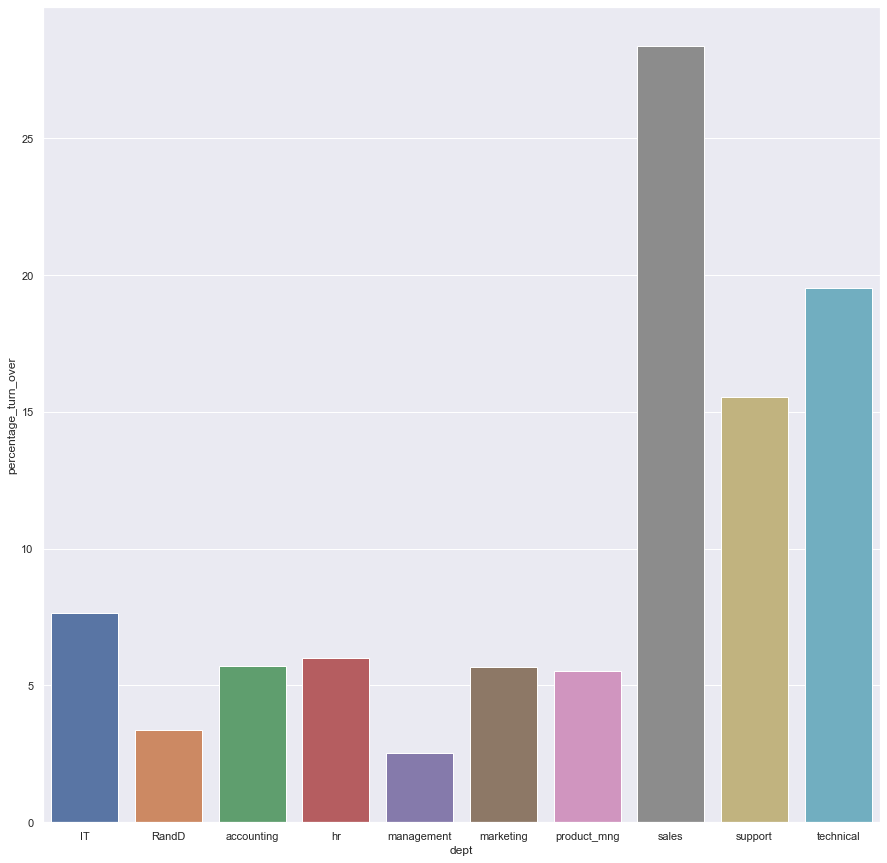

In [281]:
# Write code here to draw the plot
df_dep_left["dept"]= df_dep_left.index
sns.set(rc = {'figure.figsize':(15,15)})
sns.barplot(x="dept", y= "percentage_turn_over", data= df_dep_left)

Answer: From sales there is the maximum numer of employee who left the company as the sales men are low wages personnel so they might be having lower wage which could be the turn-out reason. The management on the other hand has medium to high wages which is can be the reason that the minimum amount of people leave from company

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """


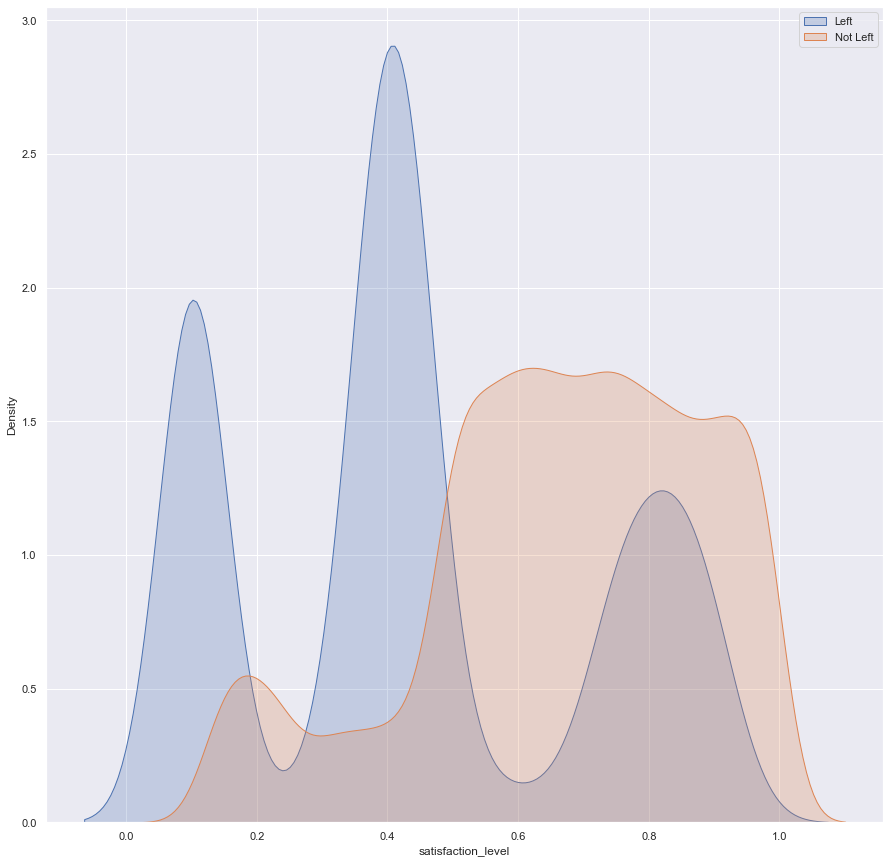

In [349]:
left_sats = df[df["left"] == 1]["satisfaction_level"]
not_left_sats = df[df["left"] == 0]["satisfaction_level"]

sns.kdeplot(left_sats, shade=True, label="Left")
sns.kdeplot(not_left_sats, shade=True, label="Not Left")
plt.legend()
plt.show()

**Question: What can you conclude from the plot above?**

The bin of 0.0 to 0.2 of satisfaction level clearly depicts the low satisfaction of population of 2/3 dense population nnd data points are present in that range.
The bin of 0.2 to 0.4 of satisfaction level clearly depicts the below average satisfaction of population of 2.8/3 dense population and data points are present in that range.
There are very few people who have left job and were satisfied with rating 0.6 to 1 with, especially those who are truely satisfied and left the job are clearly very less as seen from the declining peak from 1.2 dense population to 0.

on the other hand the low satisfaction level 0.2 to .4 have less dense people means those who are not saisfied but still working in company whereas .5 to 1 show satisfaction of dense population 

Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay.

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [351]:
# Write the code here to make bins as mentioned above
df["satisfaction_level_type"] = df['satisfaction_level'].apply(lambda x: 'High' if x >= 0.5 else 'Low')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

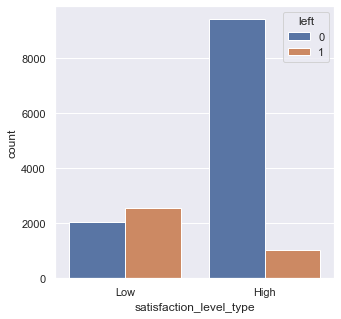

In [494]:
# Write Code Here
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(x="satisfaction_level_type", hue= "left", data= df)

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [497]:
sats_wrt_projects = df.loc[df['satisfaction_level_type'] == "High", 'number_project']
sats_wrt_projects = sats_wrt_projects.value_counts().reset_index().rename(columns={'index': 'number_project', 'number_project': 'count'})
sats_wrt_projects

,number_project,count
0,4,3807
1,3,3504
2,5,2281
3,2,591
4,6,228
5,7,5


**Make a Plot of your findings**

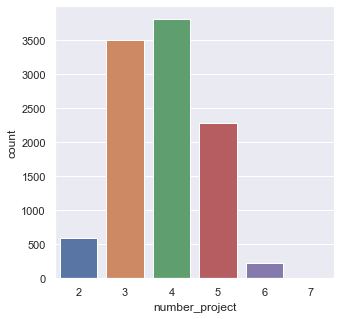

In [498]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x="number_project",y="count",  data=sats_wrt_projects )

It can be seen clearly that highly satisfied employees are on maximum assigned 4 projects then as per graph it also shows a peak less than 4 project is 3 projects per person who have shown high satisfacion from company there are a very low number of individuals who have shown high satisfaction on 2 projects and even less to those are which are assigned 6 projects. These 6 projects assigned individuals who have shown high satisfaction could be program managers

In [499]:
sats_wrt_projects = df.loc[df['satisfaction_level_type'] == "Low", 'number_project']
sats_wrt_projects = sats_wrt_projects.value_counts().reset_index().rename(columns={'index': 'number_project', 'number_project': 'count'})
sats_wrt_projects

,number_project,count
0,2,1797
1,6,946
2,4,558
3,3,551
4,5,480
5,7,251


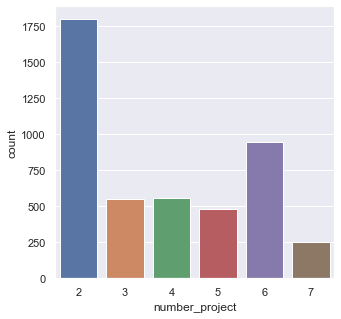

In [500]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x="number_project",y="count",  data=sats_wrt_projects )

**Question:** What did you infer drom the above plot

**Answer:**

As seen from graph above individuals who are least satisfied with company are those who are given 2 projects similarly the managers who have been given 6 and 7 projects, dissatisfaction level is also high. It can be seen that there wasnt seen individuals from graph above this graph that shows a very less range of people assigned 7 projects and shown good satisfaction

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [505]:
# Write code here

df["employee_type"] = df['number_project'].apply(lambda x: 'unburdened' if x == 2 else ('Satisfactory' if x>=3 and x<= 5 else 'Burdened'))



In [506]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,Burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,Satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,unburdened


**Task 15: Make a countplot to see which type of employee is leaving**

In [507]:
# Write code here
emp_type_leav =df.groupby('employee_type').agg({'left': 'sum'})
emp_type_leav.reset_index()

,employee_type,left
0,Burdened,911
1,Satisfactory,1093
2,unburdened,1567


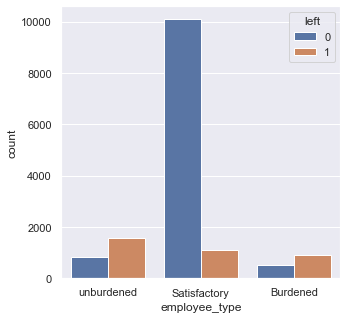

In [511]:
sns.countplot(x='employee_type', hue='left', data=df)

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [512]:
# Write code here
# Write code here
df=df.drop(['number_project','satisfaction_level'],axis=1)


# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [532]:
df_OneHot=pd.get_dummies(df,columns=["dept", "salary", "satisfaction_level_type", "employee_type"])
df_OneHot.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_unburdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [542]:
df=df_OneHot.copy()

**Task 17: Creating Independant and Dependant Variables**

In [543]:
Y=df['left']
X=df.drop(['left'],axis=1)

**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [544]:
from sklearn.model_selection import train_test_split

In [545]:
#Write code here
xtrain,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=100)


In [546]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 23) (10499,)
(4500, 23) (4500,)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [547]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [548]:
# Making instance and training the model
rf=RandomForestClassifier()


In [549]:
xtrain.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_unburdened
5220,0.50,185,3,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4819,0.91,202,2,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
9065,0.66,180,4,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
8696,0.98,241,2,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
5571,0.86,254,2,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [550]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [551]:
# Get predictions
rf_pred=rf.predict(xtest)

**Precision**

In [552]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [553]:
#Write the code to calculate
rf_precision= precision_score(ytest,rf_pred)

**Accuracy**

In [554]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score


In [556]:
# Write the code to calculate
rf_acc= accuracy_score(ytest, rf_pred)
print("Accuracy:", rf_acc)

Accuracy: 0.9853333333333333


**Recall**

In [557]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [558]:
# Write the code to calculate
rf_recall=recall_score(ytest,rf_pred)
rf_recall

0.9654231119199272

**F1-Score**

In [559]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score


In [560]:
# Write the code to calculate
rf_f1_score=f1_score(ytest,rf_pred)
rf_f1_score

0.9698354661791591

**Classification Report**

In [561]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report


In [562]:
#Write the code to calculate
target_names = ['not left', 'left']
print(classification_report(ytest, rf_pred, target_names=target_names))

              precision    recall  f1-score   support

    not left       0.99      0.99      0.99      3401
        left       0.97      0.97      0.97      1099

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



## Logistic Regression

In [564]:
# Import the model
from sklearn.linear_model import LogisticRegression


In [565]:
# Create instance and train, random _state=100
lr = LogisticRegression(random_state=100)
lr.fit(xtrain,ytrain)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=100)

In [566]:
# get the predictions
lr_pred=lr.predict(xtest)

**Accuracy**

In [567]:
#Write the code here
lr_accuracy=accuracy_score(ytest,lr_pred)
lr_accuracy

0.8608888888888889

**Precision**

In [568]:
#Write the code here
lr_precision=precision_score(ytest,lr_pred)
lr_precision

0.7307317073170732

**Recall**

In [569]:
#Write the code here
lr_recall=recall_score(ytest,lr_pred)
lr_recall

0.6815286624203821

**F1 Score**

In [571]:
#Write the code here
lr_f1_score=f1_score(ytest,lr_pred)
lr_f1_score

0.7052730696798494

**Classification Report**

In [572]:
#Write the code here
target_names = ['not left', 'left']
print(classification_report(ytest, lr_pred, target_names=target_names))

              precision    recall  f1-score   support

    not left       0.90      0.92      0.91      3401
        left       0.73      0.68      0.71      1099

    accuracy                           0.86      4500
   macro avg       0.82      0.80      0.81      4500
weighted avg       0.86      0.86      0.86      4500



## Ada Boost

In [573]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [574]:
#Write the code here to make an instance and train the model with random state =100
clf_adb=AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain,ytrain)

AdaBoostClassifier(random_state=100)

In [575]:
# Get the predictions
pred_clf_adb=clf_adb.predict(xtest)

**Accuracy**

In [576]:
#Write code here
ab_accuracy= accuracy_score(ytest,pred_clf_adb)
ab_accuracy

0.928

**Precision**

In [579]:
#Write code here
ab_precision= precision_score(ytest,pred_clf_adb)
ab_precision

0.8611369990680335

**Recall**

In [581]:
#Write code here
ab_recall= recall_score(ytest,pred_clf_adb)
ab_recall

0.8407643312101911

**F1-Score**

In [582]:
#Write code here
ab_f1_score=f1_score(ytest,pred_clf_adb)
ab_f1_score

0.850828729281768

**Classification Report**

In [583]:
#Write code here
target_names = ['not left', 'left']
print(classification_report(ytest, pred_clf_adb, target_names=target_names))

              precision    recall  f1-score   support

    not left       0.95      0.96      0.95      3401
        left       0.86      0.84      0.85      1099

    accuracy                           0.93      4500
   macro avg       0.91      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



## XG Boost

In [607]:
#Write the code here to import the model
!pip install xgboost

In [608]:
import xgboost as xgb

In [609]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [610]:
#Write the code here to make an instance and train the model with random state =100
clf_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=100, reg_alpha=0, ...)

In [611]:
# Get the predictions
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

**Accuracy**

In [614]:
#Write code here
xgb_accuracy= accuracy_score(ytest,xgb_pred)
xgb_accuracy

0.9795555555555555

**Precision**

In [616]:
#Write code here
xgb_precision= precision_score(ytest,xgb_pred)
xgb_precision

0.9615032080659945

**Recall**

In [618]:
#Write code here
xgb_recall= recall_score(ytest,xgb_pred)
xgb_recall

0.9545040946314831

**F1-Score**

In [620]:
#Write code here
xgb_f1_score=f1_score(ytest,xgb_pred)
xgb_f1_score

0.9579908675799086

**Classification Report**

In [621]:
#Write code here
target_names = ['not left', 'left']
print(classification_report(ytest, xgb_pred, target_names=target_names))

              precision    recall  f1-score   support

    not left       0.99      0.99      0.99      3401
        left       0.96      0.95      0.96      1099

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [622]:
# Write the code here
comparison_dict = {"Algorithm": ["Random Forest", "Logistic Regression", "AdaBoost", "XG Boost"],
                   "Accuracy": [rf_acc, lr_accuracy, ab_accuracy,  xgb_accuracy],
                   "Precision": [rf_precision, lr_precision, ab_precision,  xgb_precision],
                   "Recall": [rf_recall, lr_recall, ab_recall, xgb_recall],
                   "F1 Score": [rf_f1_score, lr_f1_score, ab_recall,  xgb_recall]
                   }

In [623]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.985333,0.974288,0.965423,0.969835
3,XG Boost,0.979556,0.961503,0.954504,0.954504
2,AdaBoost,0.928000,0.861137,0.840764,0.840764
1,Logistic Regression,0.860889,0.730732,0.681529,0.705273


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: 

Random Forest have accuracy of 0.985333 precision of 0.974288 most importantly recall of 0.965423 and F1score of 0.969835,thus Random forest without any  tunning on the model is best selected.